# Assignment 2

Complete the questions below in any order you like. Remember to commit the changes to GitHub as you go. The total marks for this assignment is 30.

# Question 0 [3 marks]

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub
- You will get marks for the question for using Git (i.e., pushing your assignment to the repository when asked below)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

# Question 1: Bracketing and bisection method [9 marks]

### Q. 1a [2 marks]
Define a function for the quintic $f(x) = x^5-5 x^4-15 x^3+65 x^2+74 x-120$ and plot it in the range $x=-4\dots6$

In [5]:
def f(x):
    return (x**5)-(5*x**4)-(15*x**3)+(65*x**2)+(74*x)-120

### Q. 1b [2 marks]
Using the plot, pick values of $a$ and $b$ such that $f(a) < 0$ and $f(b) > 0$ and the function has a **single** root in the region $(a,b)$. Assign variables called a and b to these values and print the values of $f(a)$ and $f(b)$.

In [6]:
x = np.arange(-5,5,0.1)
vf = np.vectorize(f)
y =vf(x)

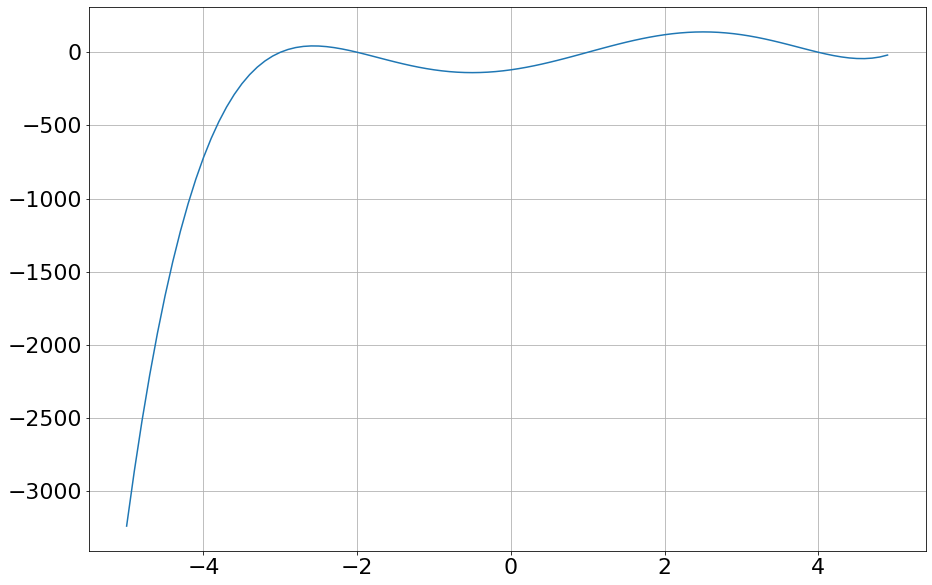

In [7]:
plt.plot(x,y)
plt.grid(True)

In [8]:
# Pick interval (0,2) such that a = 0 and b = 2
a = 0 ; b = 2

In [9]:
print("Value for f(0) = %s" % f(a))
print("Value for f(2) = %s" % (f(b)))

Value for f(0) = -120
Value for f(2) = 120


Use the following FindRootBisection method to find the root to within a precision of $10^{-12}$

In [10]:
# This function only works when a < b and f(a) < 0 < f(b)
def FindRootBisection(f, a, b, tol, printSteps=False):
    left = a
    right = b
    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint

In [11]:
print("Root of interval (a,b) within precision 1e-12 = %s" % FindRootBisection(f,  a, b, 1e-12,))

Root of interval (a,b) within precision 1e-12 = 0.9999999999990905


### Q. 1c [5 marks]
As the comment on the above FindRootBisection( ) function says it only works when $a<b$ and $f(a) < 0 < f(b)$. Create a new function that: 
 - **also** works when $f(a) > 0 > f(b)$. 
 - Checks that $\text{sign}(f(a)) \neq \text{sign}(f(b))$. If not the function should return "sign(f(a)) = sign(f(b)) ", where $a$ and $b$ have been replaced by their values
 
Call your new function FindRootBisectionImproved( ).  
Useful function: np.sign(x) will return sign(x)

Check your new function by:
 - finding the root between $x = -2.5$ and $x=-1$
 - finding the root between $x = 0$ and $x=2$
 - attempting to find a root between $x=6$ and $x=8$ (there is not root in this region)

In [314]:
def FindRootBisectionImproved(f, a, b, tol, printSteps = False):
    if np.sign(f(a)) > 0 and np.sign(f(b)) < 0 or np.sign(f(a)) < 0 and np.sign(f(b)) > 0:
        left = a
        right = b
        while right - left > tol:
            midpoint = (left+right)/2
            if f(midpoint) == 0:
                return midpoint
            if f(midpoint) < 0:
                right = midpoint
            else:
                left = midpoint
            if (printSteps == True):
                print(midpoint)
        return midpoint
    
    if np.sign(f(a)) == np.sign(f(b)):
        return print("sign(f(a)) = sign(f(b))")

In [315]:
FindRootBisectionImproved(f, -2.5, -1, 1e-12,)

-1.9999999999997726

In [316]:
FindRootBisectionImproved(f, 0, 2, 1e-12,)

1.0

In [317]:
FindRootBisectionImproved(f, 6, 8, 1e-12,)

sign(f(a)) = sign(f(b))


**Commit this question to your git repository and push the changes to GitHub**

# Question 2: Newton-Raphson method [9 marks]

### Q. 2a [3 marks]
 - Define a function $p(x) = x\log(\sqrt{x^2})$. Compute its derivative and define it as $dp(x) = \dots$
 - Plot the function between $x=-2$ and $x=2$. Label the plot axes and use a grid.
 - By visual inspection state the location of the three roots

In [322]:
def p(x):
    return x*np.log(np.sqrt(x**2))

In [323]:
def dp(x):
    return np.log(np.abs(x)) + 1

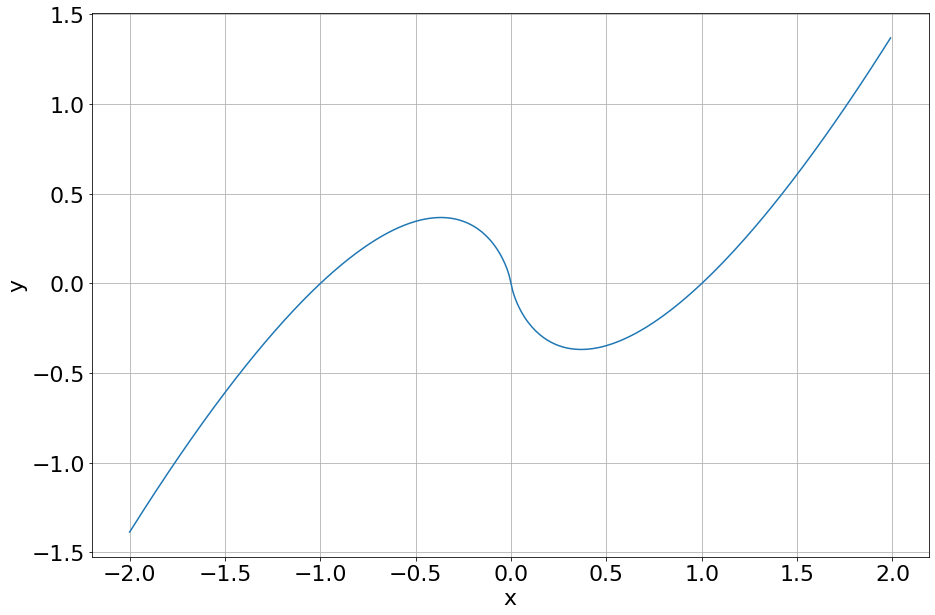

In [324]:
x = np.arange(-2, 2, 0.01)
vp = np.vectorize(p)
y = vp(x)

plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)

#From visual inspection, we can see that the three roots are at x = -1 ; x = 0 ; x = 1

### Q. 2b [2 marks]
 - Starting with a value $x_0$ near the root at $x=1$ such that $|x_0-1| \ge 0.5$ use the below Newton-Raphson code to find the root to accuracy of $1\times10^{-6}$

In [325]:
def FindRootNewtonRaphson(f, df, x0, tol, printSteps=False):
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol and count < 20:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        count += 1
        if(printSteps == True):
            print("x_%d = %.14lf" % (count, x0))
    return x0

In [326]:
FindRootNewtonRaphson(p, dp, -2, 1e-6,)

-1.0

### Q. 2c [4 marks]
As we discussed in the lectures, the Newton-Raphson method (usually) converges quadradically if an initial guess is given that is sufficiently close to the root. If the guess is too far from the root the method can diverge. In this question we will find the critical value between converging and diverging where the method oscilliates with period 2.

If we define $F(x) = x - p(x)/p'(x)$, then a period-2 orbit will occur when $F(F(x)) = x$. In general this will be a complicated function so it might be very difficult to find the solution analytically. Instead, we can write this equation as $F(F(x)) - x = 0$, so the value of $x$ we want is the root.

- Define a function F(x)
- Define a function F2(x) which returns $F(F(x)) - x$
- Plot F2(x) between $x=-0.2\dots0.2$. Restrict the range on the $y$-axis to be between $-0.5$ and $0.5$. Add labels and a grid.

In [327]:
def F(x):
    return x - (p(x)/dp(x))

In [328]:
# Defining F2: 
def F2(x):
    return F(F(x)) - x

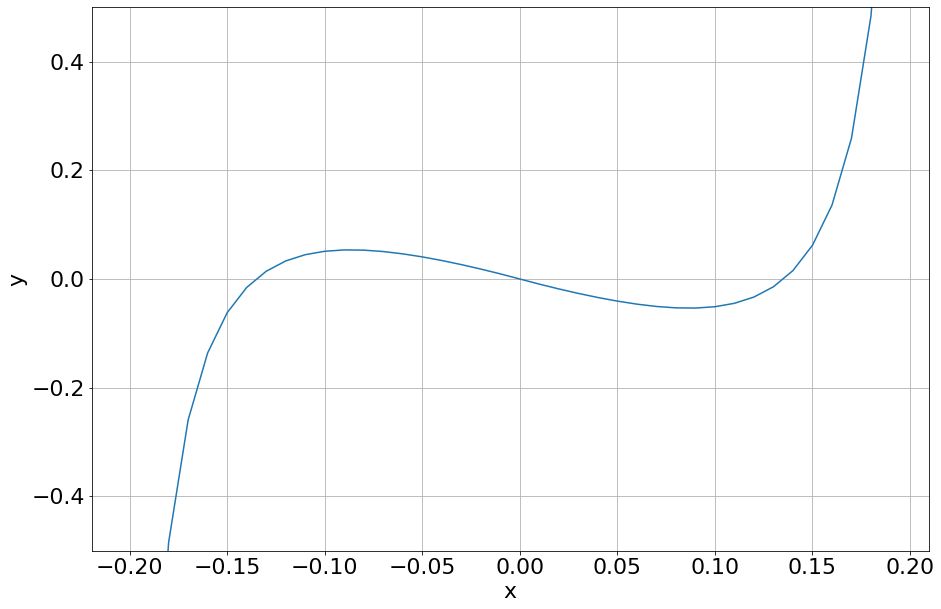

In [329]:
x = np.arange(-0.2, 0.2, 0.01)
vF2 = np.vectorize(F2)
y = vF2(x)

plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-0.5, 0.5)
plt.grid(True)
plt.plot(x,y)

- We want to find a root with $x \neq \{-1,0,1\}$. As we don't have easy access to the derivative of the function $F2(x)$ use the bisection method function from above to find a root to a precision of $10^{-15}$. Use the plot from the previous part to bracket a root. **Assign** the value of the root of the variable 'x2' and also print(x2).
- Using the Newton-Raphson method with the function $p(x)$ and the initial guess x2. Set the final argument to True to print out the steps in the method takes. You should see that they oscillate between two values and does not converge.

In [337]:
x2 = FindRootBisection(F2, 0.10, 0.15, 1e-15)
print(x2)

0.13533528323661204


In [338]:
FindRootNewtonRaphson(p, dp, x2, 1e-6, True)

x_2 = -0.13533528323661
x_3 = 0.13533528323661
x_4 = -0.13533528323661
x_5 = 0.13533528323660
x_6 = -0.13533528323659
x_7 = 0.13533528323657
x_8 = -0.13533528323653
x_9 = 0.13533528323644
x_10 = -0.13533528323627
x_11 = 0.13533528323594
x_12 = -0.13533528323526
x_13 = 0.13533528323391
x_14 = -0.13533528323120
x_15 = 0.13533528322578
x_16 = -0.13533528321496
x_17 = 0.13533528319330
x_18 = -0.13533528314999
x_19 = 0.13533528306337
x_20 = -0.13533528289012


-0.1353352828901236

By slightly perturbing the initial guess we can get the method to converge or diverge. Try:
 - adding $10^{-3}$ to the initial guess. Does the method converge or diverge? If it converges, to which root does it converge?
 - subtracting $10^{-3}$ from the initial guess. Does the method converge or diverge? If it converges, to which root does it converge?
 
In both cases set the final argument to 'True' to get the function to print the steps the method is taking

**Commit this question to your git repository and push the changes to GitHub**

In [340]:
FindRootNewtonRaphson(p, dp, x2+1e-3, 1e-6, True)

x_2 = -0.13734641252178
x_3 = 0.13940274435167
x_4 = -0.14365669284137
x_5 = 0.15277281420572
x_6 = -0.17384186884629
x_7 = 0.23191000128709
x_8 = -0.50261602037049
x_9 = -1.61058113397135
x_10 = -1.09073988553266
x_11 = -1.00357326506205
x_12 = -1.00000634630754
x_13 = -1.00000000002014
x_14 = -1.00000000000000


-1.0

When we perturb the initial guess by adding $10^-3$, the Newton Raphson Method converges to -1

In [342]:
FindRootNewtonRaphson(p, dp, x2-1e-3, 1e-6, True)

x_2 = -0.13334632152317
x_3 = 0.13140085125822
x_4 = -0.12763526695954
x_5 = 0.12057231447082
x_6 = -0.10808759363305
x_7 = 0.08824821801378
x_8 = -0.06181571044991
x_9 = 0.03465787678808
x_10 = -0.01467167593715
x_11 = 0.00455382393267
x_12 = -0.00103689521430
x_13 = 0.00017659727582
x_14 = -0.00002310986987
x_15 = 0.00000238855513
x_16 = -0.00000019996574
x_17 = 0.00000001386233
x_18 = -0.00000000081094


-8.109426700637063e-10

When we perturb the initial guess by subtracting $10^-3$, the Newton Raphson Method converges to 0 





# Question 3: Slow convergence of the Newton-Raphson method at repeated roots [9 marks]
The Newton-Raphson method usual converges quadratically but it will converge more slowly at repeated roots. In this question we will look at an example of this.

Define the function $g(x) = (x+1)^2(x-2)$, and also define its derivative $g'(x)$. Plot the function from $x=-2\dots2.5$

In [120]:
def g(x):
    return ((x+1)**2)*(x-2)

In [121]:
def dg(x):
    return 3*(x**2)-3

Text(0, 0.5, 'y')

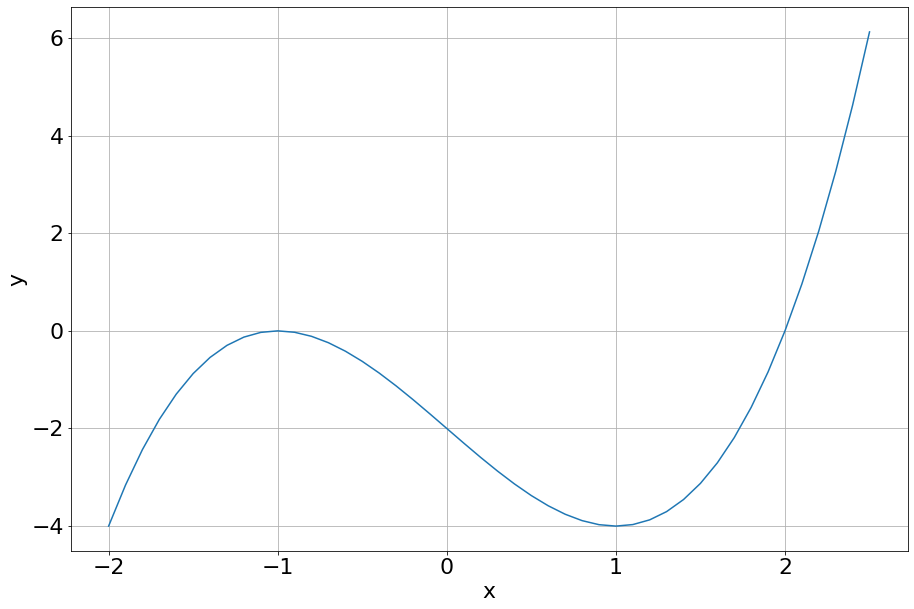

In [123]:
x = np.arange(-2, 2.6, 0.1)
vg = np.vectorize(g)
y = vg(x)

plt.plot(x,y)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")

Run the FindRootNewtonRaphson command with the final (optional) argument set to True to see the steps the algorithm takes. Run it with:
 - the initial value of $x_0 = -1.5$
 - the initial value of $x_0 = 1.5$

In [36]:
def FindRootNewtonRaphson(f, df, x0, tol, printSteps=False):
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol and count < 20:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        count += 1
        if(printSteps == True):
            print("x_%d = %.14lf" % (count, x0))
    return x0

In [37]:
# x0 = -1.5
FindRootNewtonRaphson(g, dg, -1.5, 1e-6, True)

x_2 = -1.26666666666667
x_3 = -1.13856209150327
x_4 = -1.07077733565581
x_5 = -1.03579185227111
x_6 = -1.01800080397360
x_7 = -1.00902716353409
x_8 = -1.00452034206070
x_9 = -1.00226186998146
x_10 = -1.00113136084710
x_11 = -1.00056578702802
x_12 = -1.00028292018271


-1.0002829201827148

In [38]:
# x0 = 1.5
FindRootNewtonRaphson(g, dg, 1.5, 1e-6, True)

x_2 = 2.33333333333333
x_3 = 2.05555555555556
x_4 = 2.00194931773879
x_5 = 2.00000252829797
x_6 = 2.00000000000426
x_7 = 2.00000000000000


2.0

What do you notice about the convergence rates in these two cases? Let's examine it more carefully. The function below returns the individual steps of the Newton-Raphson algorithm.

In [126]:
def FindRootNewtonRaphsonSteps(f, df, x0, tol):
    steps = np.array([x0])
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        steps = np.append(steps, x0)
        count += 1
    return steps

Using the above function:
- compute the steps for the function $g(x)$ with  $x_0 = 1.5$. Assign the result to a variable.
- compute the steps for the function $g(x)$ with  $x_0 = -1.5$. Assign the result to a different variable.

In [128]:
Steps1 = FindRootNewtonRaphsonSteps(g, dg, 1.5, 1e-6)
print(Steps1)

print("")

Steps2 = FindRootNewtonRaphsonSteps(g, dg, -1.5, 1e-6)
print(Steps2)

[1.5        2.33333333 2.05555556 2.00194932 2.00000253 2.
 2.        ]

[-1.5        -1.26666667 -1.13856209 -1.07077734 -1.03579185 -1.0180008
 -1.00902716 -1.00452034 -1.00226187 -1.00113136 -1.00056579 -1.00028292]


Plot the absolute difference between the steps and the relevant root, i.e., $|x_n - x_*|$, on a log scale.

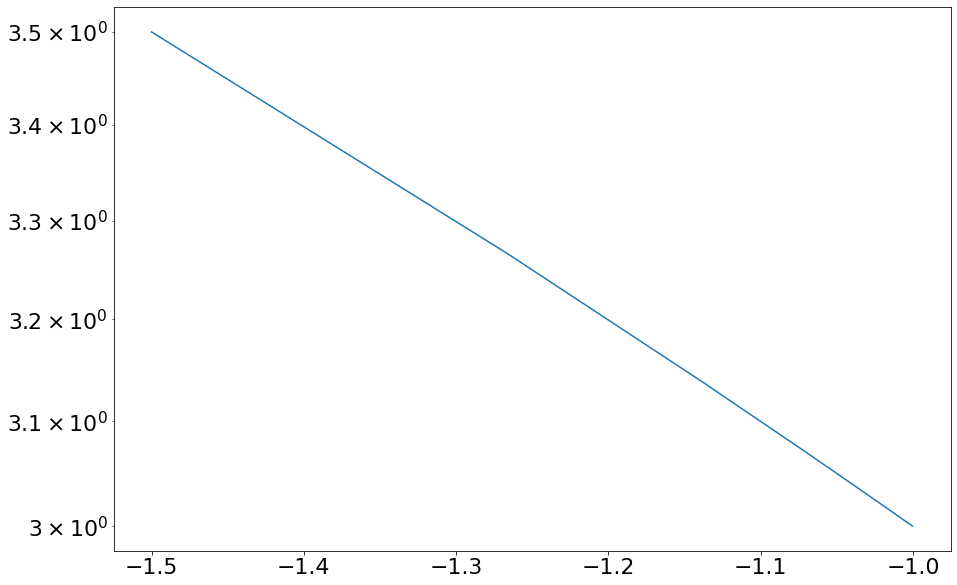

In [165]:
# Take the steps when x_0 = 1.5, so the relevant root is 2
x_relevant = 2
def AbsoluteDifference(x):
    return np.abs(x - x_relevant)

x_Steps = np.array([-1.5, -1.26666667, -1.13856209, -1.07077734, -1.03579185, -1.0180008, -1.00902716,  -1.00452034, -1.00226187, -1.00113136, -1.00056579, -1.00028292])
AbsoluteDifference(x_Steps)
y = AbsoluteDifference(x_Steps)

plt.plot(x_Steps,y)
plt.yscale("log")

You should find the repeated difference for the repeated root looks linear on the log-scale, which is the same as we saw for the bisection method. This (correctly) suggests that for repeated roots the Newton-Raphson converges linearly (rather than quadratically)

**Commit this question to your git repository and push the changes to GitHub**

## Submitting your assignment to BrightSpace

To submit your assignment compress your entire ACM20030-Assignments folder (this will contain this assignment and assignment 1) and uploaded the zip file to BrightSpace. DO NOT download the zip file from the GitHub browser interface.